# NoteBook sur le modèle BERT (Bidirectional Encodeur Representation Transformer)
  - Sujet : Analyse de Sentiment dans du texte

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd '/gdrive/My Drive/NeuralNets/BERT'

/gdrive/My Drive/NeuralNets/BERT


- Installer Ktrain (https://towardsdatascience.com/ktrain-a-lightweight-wrapper-for-keras-to-help-train-neural-networks-82851ba889c)

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 110kB/s 
     |████████████████████████████████| 6.8MB 29.4MB/s 
     |████████████████████████████████| 983kB 35.6MB/s 
     |████████████████████████████████| 266kB 30.3MB/s 
     |████████████████████████████████| 1.9MB 38.1MB/s 
     |████████████████████████████████| 1.2MB 33.7MB/s 
     |████████████████████████████████| 471kB 29.4MB/s 
     |████████████████████████████████| 901kB 34.1MB/s 
     |████████████████████████████████| 3.3MB 34.9MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.4-cp37-none-any.whl size=25282461 sha256=0df58bbf6d005f44d44efb9ebdd85e17a296bc7681658d03d2e5230dba597e4d
  Stored in directory: /root/.cache/pip/wheels/95/cc/1b/84c3799864cd864b99d94a8aeac2ee2d928fb3d0ec3d3f1a13
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=5a26dc908abbd0b85929d872913316ada23924acac1fea270b17bd1c079db3a7
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7d

# Version avec bib keras_bert (en suspend)voir version ktrain

In [ ]:
import keras_bert
import ktrain
from ktrain import text

- Tensorflow

In [ ]:
import tensorflow as tf

- Données
  - IMBD (50K)
  - Selon la doc keras :
    - This is a dataset of **50,000 movies reviews** from IMDB, **labeled by sentiment (positive/negative)**. **Reviews have been preprocessed**, and each review is **encoded as a list of word indexes (integers)**. For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words". As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [ ]:
from tensorflow.keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [ ]:
from keras_bert import get_base_dict, gen_batch_inputs

dico = get_base_dict()
dico

{'': 0, '[CLS]': 2, '[MASK]': 4, '[SEP]': 3, '[UNK]': 1}

In [ ]:
word2idx = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
for k, v in dico.items():
  word2idx[k] = len(word2idx) + 1

- Padding (list to ndaary

In [ ]:
X_train = [x for x in x_train]
X_test = [x for x in x_test]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = 2494, padding='post')
X_test = pad_sequences(X_test, maxlen = 2494, padding='post')

In [ ]:
X_train[0]

array([ 1, 14, 22, ...,  0,  0,  0], dtype=int32)

In [ ]:
y_train, y_test

(array([1, 0, 0, ..., 0, 1, 0]), array([0, 1, 1, ..., 0, 0, 0]))

In [ ]:
Y_train = y_train.reshape(-1,1)
Y_test = y_test.reshape(-1,1)

In [ ]:
# One encoded les sorties - C'eest ce qui est attendu par BERT
y_tr = np.zeros(shape = (25000, 2))
y_tt = np.zeros(shape = (25000, 2))

for i, y in enumerate(y_train):
  if y:
    y_tr[i] = [1.0, 0.0]
  else:
    y_tr[i] = [0.0, 1.0]

for i, y in enumerate(y_test):
  if y:
    y_tt[i] = [1.0, 0.0]
  else:
    y_tt[i] = [0.0, 1.0]

In [ ]:
y_tr

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

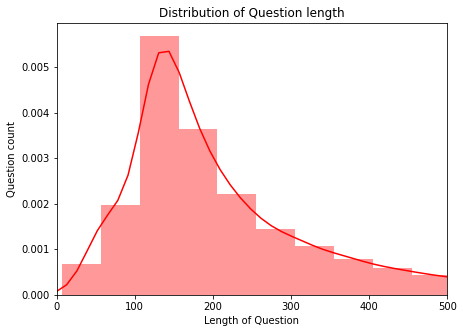

In [ ]:
# Petit regard sur la distribution en terle de longeur
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

all_questions = np.hstack((x_train, x_test))

question_len = [len(text.split(' ')) for text in all_questions]

plt.figure(figsize=(7,5))
sns.distplot(question_len, color='red')
plt.title('Distribution of Question length')
plt.xlabel('Length of Question')
plt.ylabel('Question count')
plt.xlim(0, 500)
plt.show()

- Le plus souvent on a (en moyenne) des review entre >100 et 150 caractères

In [ ]:
max(question_len), min(question_len)

(2494, 7)

In [ ]:
for i in range(0,11):
    print(10*i,'percentile value is', np.percentile(question_len,10*i))

0 percentile value is 7.0
10 percentile value is 92.0
20 percentile value is 121.0
30 percentile value is 136.0
40 percentile value is 154.0
50 percentile value is 176.0
60 percentile value is 207.0
70 percentile value is 253.0
80 percentile value is 325.0
90 percentile value is 457.0
100 percentile value is 2494.0


Avec une longeur de 457 on 90% des review
==> On pourrait conservé que celle de moins de 460

- Modèle BERT

In [ ]:
model = text.text_classifier(name = 'bert', train_data= (x_train, y_train), metrics = ['accuracy'])

ValueError: ignored

In [ ]:
(X_train, Y_train), (X_test, Y_test), prepro = ktrain.text.texts_from_array(x_train, y_tr, x_test, y_tt, class_names = ['pos', 'neg'], maxlen = 460, preprocess_mode = 'bert')

preprocessing train...
language: en


/usr/local/lib/python3.7/dist-packages/ktrain/text/textutils.py:240: UserWarning: Defaulting to English for language detection: could not detect language from documents. This may be due to empty or invalid texts being provided to detect_lang.
  warnings.warn('Defaulting to English for language detection: could not detect language from documents. '+\


TypeError: ignored

- Partie qui marche

- Ajouter manquant

In [ ]:
model = keras_bert.get_model(token_num = len(word2idx), pos_num = 2494, seq_len = 2494)

In [ ]:
import os
from ktrain.text import models

#preproc.max_features
len(preproc.tok_dct)

model = models._build_bert(num_classes = len(preproc.get_classes()), maxlen = 500, max_features = preproc.max_features, features = None, preproc = preproc)

#lang = preproc.lang

#if lang is None: raise ValueError('lang is missing')
#config_path = os.path.join(tpp.get_bert_path(lang=lang), 'bert_config.json')
#checkpoint_path = os.path.join(tpp.get_bert_path(lang=lang), 'bert_model.ckpt')


TypeError: ignored

In [ ]:
preproc.get_classes(), len(preproc.get_classes())

(['neg', 'pos'], 2)

In [ ]:
def model():

    model = keras_bert.get_pretrained()
    model = keras_bert.load_trained_model_from_checkpoint(
                                        config_path,
                                        checkpoint_path,
                                        training=True,
                                        trainable=True,
                                        seq_len=maxlen)
    inputs = model.inputs[:2]
    dense = model.get_layer('NSP-Dense').output
    outputs = Dense(units=num_classes, activation=activation)(dense)
    model = Model(inputs, outputs)
    model.compile(loss=loss_func,
                      optimizer=U.DEFAULT_OPT,
                      metrics=metrics)

    return model

In [ ]:
model.layers

In [ ]:
model.compile(optimizer='SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 2494)]       0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 2494)]       0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 2494, 768),  68036352    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 2494, 768)    1536        Input-Segment[0][0]              
____________________________________________________________________________________________

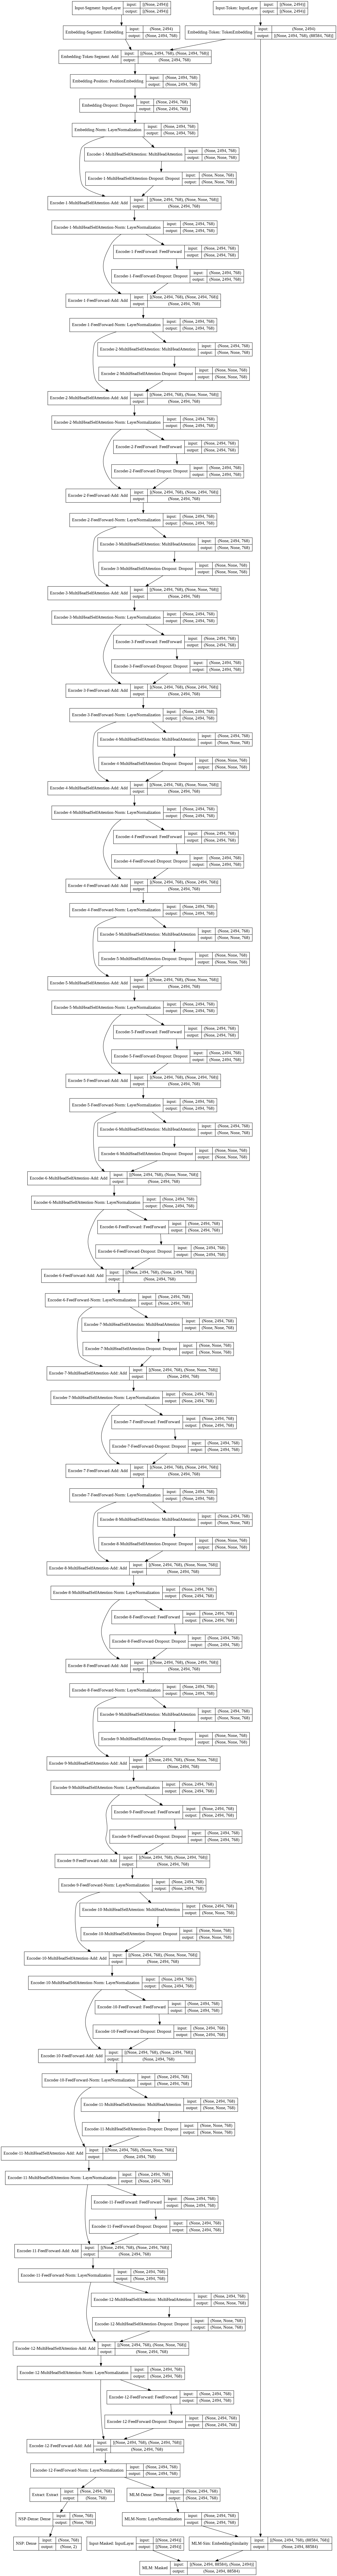

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
def _generator():
    while True:
        yield gen_batch_inputs(sentence_pairs = X_train, dico, word2idx.keys(), seq_len = 2494)

SyntaxError: ignored

In [ ]:
model.fit((X_train, X_train, X_train), y_tr, batch_size = 128, epochs = 5)

Epoch 1/5


TypeError: ignored

# Version Ktrain
  - J'ai a faire à un problème profond dans la bib ktrain, qui me laisse béa, j'ignore comment le résoudre il faudrait peut-être remonter l'erreur a qui de droit ...

- Libs

In [ ]:
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

- Données

In [ ]:
train_df = pd.read_excel('train.xlsx', dtype = str)
test_df = pd.read_excel('test.xlsx', dtype = str) # Rajouter dtype sinon BERT va se plaindre qu'il attendait des str et pas des int pour la colonne label

In [ ]:
train_df.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg


In [ ]:
%ls

test.xlsx  train.xlsx  Untitled0.ipynb


- Stats

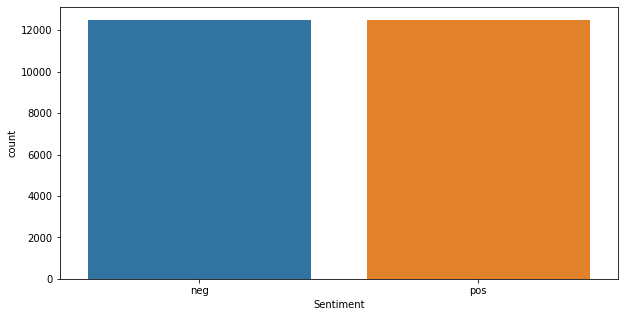

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
sns.countplot(x = 'Sentiment', data = train_df, order = train_df['Sentiment'].value_counts().index)

In [ ]:
train_df['Sentiment'].value_counts()

neg    12500
pos    12500
Name: Sentiment, dtype: int64

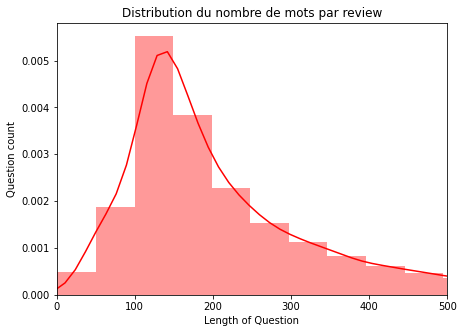

In [ ]:
# Petit regard sur la distribution en terle de longeur
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#all_questions = np.hstack((x_train, x_test))

all_questions = train_df.Reviews.values

nb_words = [len(str(text).split(' ')) for text in all_questions]

plt.figure(figsize=(7,5))
sns.distplot(nb_words, color='red')
plt.title('Distribution du nombre de mots par review')
plt.xlabel('Length of Question')
plt.ylabel('Question count')
plt.xlim(0, 500)
plt.show()

In [ ]:
for i in range(0,11):
    print(10*i,'percentile value is', np.percentile(nb_words,10*i))

0 percentile value is 1.0
10 percentile value is 91.0
20 percentile value is 120.0
30 percentile value is 134.0
40 percentile value is 151.0
50 percentile value is 174.0
60 percentile value is 206.0
70 percentile value is 252.0
80 percentile value is 325.0
90 percentile value is 458.0
100 percentile value is 2470.0


-> Avec une longeur de mot de 458 on englobe 90% des review. Puis en entre 90 et 100, on a un gros fossé de 458 --> 2470 mots, j'imagine qu'il doit y avoir des outliners avec bcp de mot mais peu nombreux dans l'ensemble, tronquer à 500 mots me semble correct. 

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    25000 non-null  object
 1   Sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [ ]:
max(nb_words), min(nb_words)

(2470, 1)

- Val

In [ ]:
validation_df = test_df.head(15000)

- Pre-process par ktrain

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = ktrain.text.texts_from_df(train_df = train_df, text_column = 'Reviews', label_columns = 'Sentiment', val_df = test_df, maxlen = 500, preprocess_mode = 'bert') # on fixe ) 

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
X_train

[array([[ 101, 2043, 1045, ...,    0,    0,    0],
        [ 101, 8210, 4301, ...,    0,    0,    0],
        [ 101, 2339, 2515, ...,    0,    0,    0],
        ...,
        [ 101, 2026, 2643, ...,    0,    0,    0],
        [ 101, 2043, 1045, ..., 1028, 2054,  102],
        [ 101, 2061, 2339, ..., 2024, 6160,  102]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

-> Je crois que cette double entrée (array1 et 2) correspond à la pair que doit former l'input du modèke BERT.

Sauf que la 2ième moitié est juste une liste de 0 (histoire de dire que pas utilisé ?)

In [ ]:
preproc.get_classes()

['neg', 'pos']

In [ ]:
preproc.get_preprocessor()

(<keras_bert.tokenizer.Tokenizer at 0x7fe276c26850>,
 {0: '[PAD]',
  1: '[unused0]',
  2: '[unused1]',
  3: '[unused2]',
  4: '[unused3]',
  5: '[unused4]',
  6: '[unused5]',
  7: '[unused6]',
  8: '[unused7]',
  9: '[unused8]',
  10: '[unused9]',
  11: '[unused10]',
  12: '[unused11]',
  13: '[unused12]',
  14: '[unused13]',
  15: '[unused14]',
  16: '[unused15]',
  17: '[unused16]',
  18: '[unused17]',
  19: '[unused18]',
  20: '[unused19]',
  21: '[unused20]',
  22: '[unused21]',
  23: '[unused22]',
  24: '[unused23]',
  25: '[unused24]',
  26: '[unused25]',
  27: '[unused26]',
  28: '[unused27]',
  29: '[unused28]',
  30: '[unused29]',
  31: '[unused30]',
  32: '[unused31]',
  33: '[unused32]',
  34: '[unused33]',
  35: '[unused34]',
  36: '[unused35]',
  37: '[unused36]',
  38: '[unused37]',
  39: '[unused38]',
  40: '[unused39]',
  41: '[unused40]',
  42: '[unused41]',
  43: '[unused42]',
  44: '[unused43]',
  45: '[unused44]',
  46: '[unused45]',
  47: '[unused46]',
  48: '[unus

In [ ]:
a, b = preproc.get_preprocessor()

In [ ]:
b[2043], b[1045]

('when', 'i')

In [ ]:
train_df['Reviews'][0]

'When I first tuned in on this morning news, I thought, "wow, finally, some entertainment." It was slightly amusing for a week or so... But we have to face it, these news reporters (if one can even call them that) have WAY TOO MUCH "playing around" time.<br /><br />At first, I thought Jillian was a breathe of fresh air. But seriously, this woman has got not the least bit of journalist in her. She is very unprofessional. She keeps on interrupting Steve when he starts informing the viewers about a certain news report. It\'s just really become annoying to the point that I can\'t watch it anymore.<br /><br />Jillian is NOT a good journalist. Hell, she\'s more of a celebrity who loves being a celebrity. Hence, she instantly transforms into a celebrity around celebrities whom she\'s supposed to be interviewing. She\'s not very professional and quite possibly perceives her relationship with celebrities more important than being a rightfully insatiable journalist- and that\'s all I can say abo

In [ ]:
X_train[0][0]

array([  101,  2043,  1045,  2034, 15757,  1999,  2006,  2023,  2851,
        2739,  1010,  1045,  2245,  1010,  1000, 10166,  1010,  2633,
        1010,  2070,  4024,  1012,  1000,  2009,  2001,  3621, 19142,
        2005,  1037,  2733,  2030,  2061,  1012,  1012,  1012,  2021,
        2057,  2031,  2000,  2227,  2009,  1010,  2122,  2739, 12060,
        1006,  2065,  2028,  2064,  2130,  2655,  2068,  2008,  1007,
        2031,  2126,  2205,  2172,  1000,  2652,  2105,  1000,  2051,
        1012,  1026,  7987,  1013,  1028,  1026,  7987,  1013,  1028,
        2012,  2034,  1010,  1045,  2245, 27286,  2001,  1037,  7200,
        1997,  4840,  2250,  1012,  2021,  5667,  1010,  2023,  2450,
        2038,  2288,  2025,  1996,  2560,  2978,  1997,  4988,  1999,
        2014,  1012,  2016,  2003,  2200,  4895, 21572,  7959, 28231,
        2389,  1012,  2016,  7906,  2006, 22602,  3889,  2043,  2002,
        4627, 21672,  1996,  7193,  2055,  1037,  3056,  2739,  3189,
        1012,  2009,

In [ ]:
# Reverse le process
preproc.undo(X_train[0][0])

'[CLS] when i first tuned in on this morning news , i thought , " wow , finally , some entertainment . " it was slightly amusing for a week or so . . . but we have to face it , these news reporters ( if one can even call them that ) have way too much " playing around " time . < br / > < br / > at first , i thought jillian was a breathe of fresh air . but seriously , this woman has got not the least bit of journalist in her . she is very un ##pro ##fe ##ssion ##al . she keeps on interrupting steve when he starts informing the viewers about a certain news report . it \' s just really become annoying to the point that i can \' t watch it anymore . < br / > < br / > jillian is not a good journalist . hell , she \' s more of a celebrity who loves being a celebrity . hence , she instantly transforms into a celebrity around celebrities whom she \' s supposed to be interviewing . she \' s not very professional and quite possibly perceive ##s her relationship with celebrities more important tha

In [ ]:
tf.__version__

'2.5.0'

- Modèle

In [ ]:
model = ktrain.text.text_classifier(name = 'bert', train_data = (X_train, y_train), preproc = preproc)

Is Multi-Label? False
maxlen is 500


TypeError: ignored

In [ ]:
learner = ktrain.get_learner(model,train_data=(X_train, y_train),
                             val_data=(X_test, y_test), batch_size=6)

learner.lr_find()
learner.lr_plot()

# Fine-Tuned BERT

  - Un modèle BERT pré-entrainé au top de ce qui se fait (state-of-the-art) sur Wikipedia + 10K livre de genre =/
  - BERT : +s Encodeur d'un Transformer, stacké/empilé
  - Un set de tweet provennat de la plateforme des gazouilli.
  - But : le sujet de ces tweet portent sur des cas de désatres et ou accidents, le but est de comprendre la langue pour identifer ce qui ne sont que des histoires et ceux qui sont vrai

In [46]:
import re, string, os
import numpy as np
import pandas as pd

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Perfs
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

- Charger Données

In [8]:
tweets = pd.read_csv('train-tweet.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
tweets['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


- Viz

- Target Class Distribution

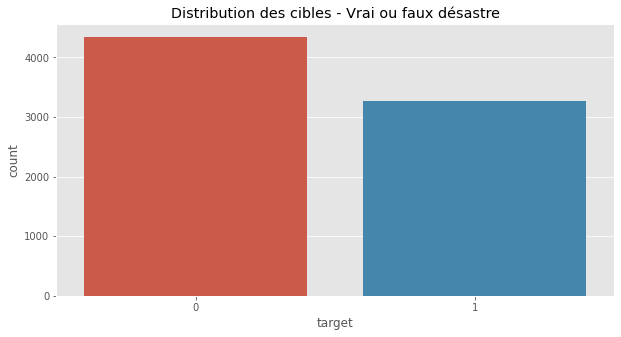

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.title('Distribution des cibles - Vrai ou faux désastre')
sns.countplot(x = 'target', data = tweets, order = tweets['target'].value_counts().index)

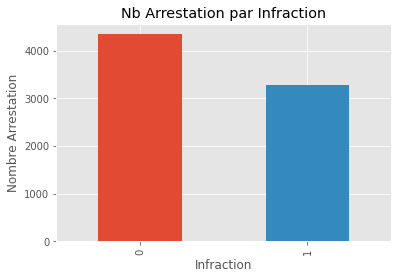

In [ ]:
tweets.target.value_counts().plot(kind = 'bar', title = 'Nb de Tweets par Catégorie', xlabel = 'Catégories', ylabel = 'Nombre Tweets', color = ['C0', 'C1'])

In [ ]:
tweets.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
import plotly.express as px
import plotly.graph_objects as gn

def barplot_viz(colonne_nom):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = tweets[colonne_nom].value_counts().index, y = tweets[colonne_nom].value_counts(), color = tweets[colonne_nom].value_counts().index, height = 600)
  fig.show()

In [ ]:
barplot_viz('target')

- Diagramme Tarte

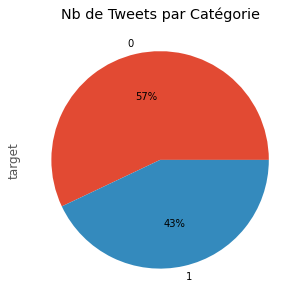

In [ ]:
plt.figure(figsize = (10, 5))
tweets.target.value_counts().plot(kind = 'pie', title = 'Nb de Tweets par Catégorie', autopct = '%1.0f%%')

- Nb Mots Distribution in Tweets Set

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



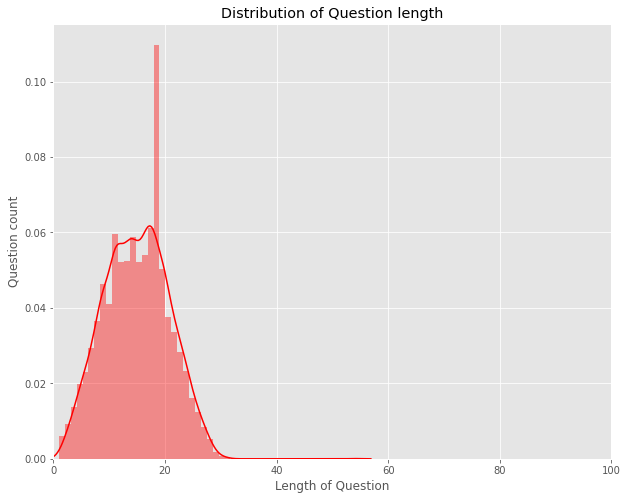

In [ ]:
# Petit regard sur la distribution en terle de longeur
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

all_tweets = tweets.text.values

tweets_len = [len(text.split(' ')) for text in all_tweets]

plt.figure(figsize=(10,8))
sns.distplot(tweets_len, color='red')
plt.title('Distribution of Question length')
plt.xlabel('Length of Question')
plt.ylabel('Question count')
plt.xlim(0, 100)
plt.show()

In [ ]:
for i in range(0,11):
    print(10*i,'percentile value is', np.percentile(tweets_len,10*i))

print(np.mean(tweets_len))

0 percentile value is 1.0
10 percentile value is 7.0
20 percentile value is 10.0
30 percentile value is 11.0
40 percentile value is 13.0
50 percentile value is 15.0
60 percentile value is 17.0
70 percentile value is 18.0
80 percentile value is 20.0
90 percentile value is 23.0
100 percentile value is 54.0
14.928937344016813


--> En moyenne les tweets sont autour deS 15 mots (REPRÉSENTE : 50% des tweets) 

- Nb Char Distribution in Tweets Set

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



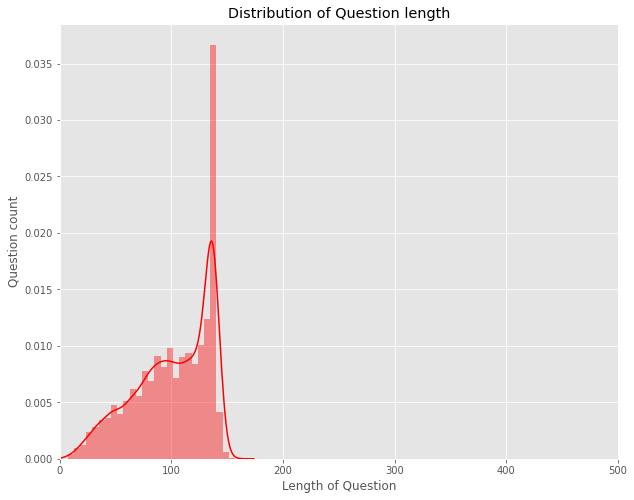

In [ ]:
# Petit regard sur la distribution en terle de longeur
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

all_tweets = tweets.text.values

tweets_len = [len(text) for text in all_tweets]

plt.figure(figsize=(10,8))
sns.distplot(tweets_len, color='red')
plt.title('Distribution of Question length')
plt.xlabel('Length of Question')
plt.ylabel('Question count')
plt.xlim(0, 500)
plt.show()

In [ ]:
for i in range(0,11):
    print(10*i,'percentile value is', np.percentile(tweets_len,10*i))

print(np.mean(tweets_len))

0 percentile value is 7.0
10 percentile value is 49.0
20 percentile value is 70.0
30 percentile value is 84.0
40 percentile value is 95.0
50 percentile value is 107.0
60 percentile value is 119.0
70 percentile value is 129.0
80 percentile value is 136.0
90 percentile value is 138.0
100 percentile value is 157.0
101.03743596479706


-->  50% sont des twwets de 100 caractères avec au maximun de ~150 caractères.

--> La moyenne se situe à ~100 carac

- Regardons pareils mais par rapport à chaque cible

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

No handles with labels found to put in legend.


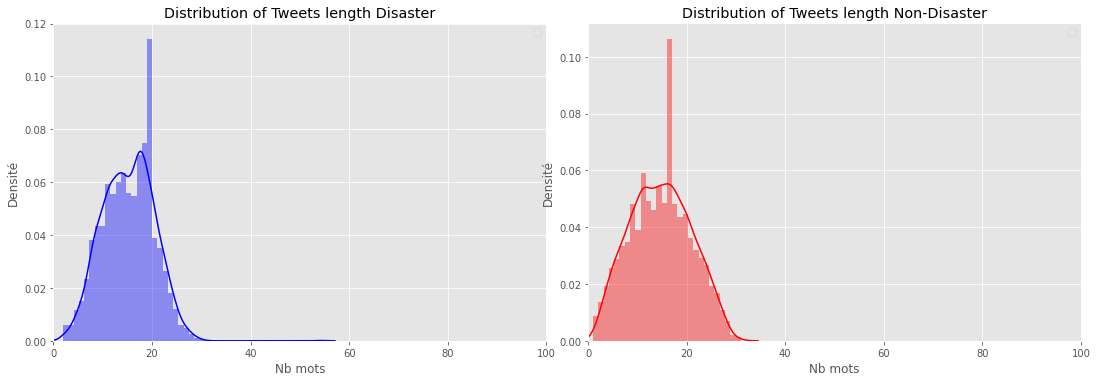

In [ ]:
# Petit regard sur la distribution en terme de longeur par catégorie

all_tweets1 = tweets.text[tweets['target'] == 1]
all_tweets0 = tweets.text[tweets['target'] == 0]

tweets_len1 = [len(text.split(' ')) for text in all_tweets1]
tweets_len0 = [len(text.split(' ')) for text in all_tweets0]

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.tight_layout()

sns.distplot(tweets_len1, color='blue', ax = axs[0]) # ax=axs[0] pour l'ancrer à AxesSubplot 0
axs[0].set_title('Distribution of Tweets length Disaster')
axs[0].set(xlabel = "Nb mots", ylabel = "Densité")
axs[0].set_xlim(0, 100)
axs[0].legend()

sns.distplot(tweets_len0, color='red', ax = axs[1])
axs[1].set_title('Distribution of Tweets length Non-Disaster')
axs[1].set(xlabel = "Nb mots", ylabel = "Densité")
axs[1].set_xlim(0, 100)
axs[1].legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



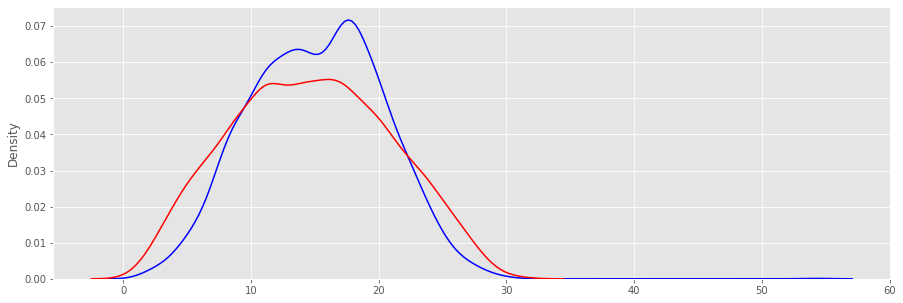

In [ ]:
plt.figure(figsize = (15, 5))
sns.distplot(tweets_len1, color='blue', hist = False)
sns.distplot(tweets_len0, color='red', hist = False)

In [ ]:
# Bon comme nombre de mot et nombre de caractère sont très corrélé, pas la peine de faire ce cas.
# On constate que les tweet ne traitant apparement pas de desastre réel tendent à être moins pompeux (les gens moins de connerie, je présumes) 

In [ ]:
tweets['char_count'] = [len(text) for text in tweets['text'].values]
tweets.head()

,id,keyword,location,text,target,char_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


<Figure size 1440x1080 with 0 Axes>

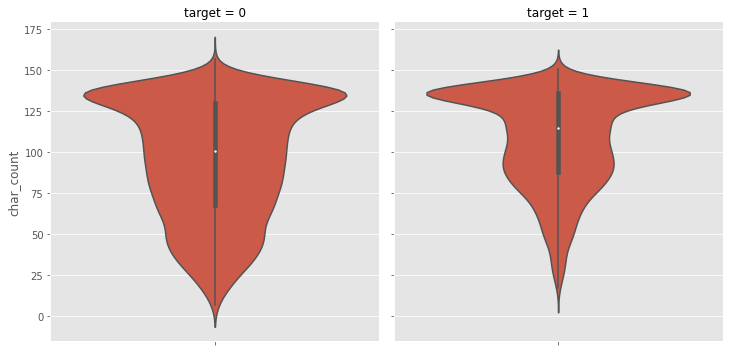

In [ ]:
plt.figure(figsize = (20, 15))
sns.catplot(y = 'char_count', data = tweets, kind = 'violin', col = 'target') # col = split by target

--> Quand on a un vrai désastre le nombre totale de caract_re se concentre autour des 130 caractères 

- Stopwords ?
  - il existe toujours des mots dont la fréquence de répétition fait qu'ils finissent par être tellement employés, tellement connus, que plus personne, et surtout les moteurs de recherche n'en tient compte.
Si leur présence dans un texte est cependant obligatoire pour que celui-ci soit correctement rédigé et compréhensible, ces 'mots vides' s'opposent aux autres mots, les  'mots pleins' qui eux seront beaucoup mieux perçus et par les moteurs et par les lecteurs ...

In [9]:
# Charger à partir d'une liste
stopwords = set(w.rstrip() for w in open('/gdrive/My Drive/NLP/LSA/stopwords.txt'))

# Ajouter des moments au set = union (~append pour les listes)
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

In [10]:
# Compter les stopwords
tweets['stopword_counts'] = tweets.text.apply(lambda x : len([mot for mot in x.split() if mot in stopwords]) )

In [ ]:
tweets.head()

,id,keyword,location,text,target,char_count,stopword_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,5
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,12
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,6


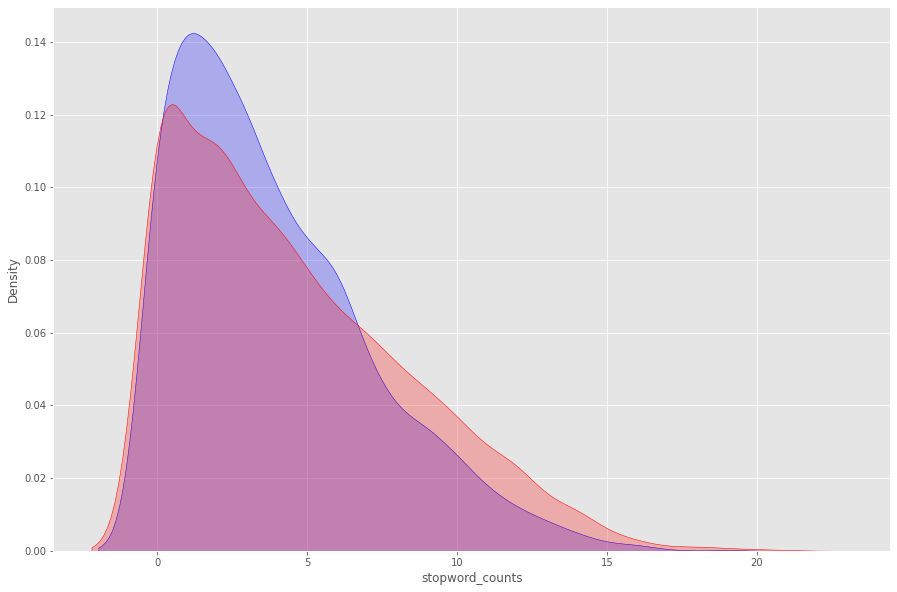

In [ ]:
plt.figure(figsize = (15, 10))
sns.kdeplot(tweets[tweets['target'] == 1]['stopword_counts'], shade = True, color = 'blue',)
sns.kdeplot(tweets[tweets['target'] == 0]['stopword_counts'], shade = True, color = 'red')

--> Cl : Les tweets ne traitant pas d'un désastre concentre moins de stopword, une explication serait quand voulant donner d'avantage d'information (on va vu qu'il y avait plus de mot), on va ajouter plus de détail

- Mots les plus/moins communs

In [ ]:
from collections import Counter

counter = Counter(' '.join(tweets.text.values.tolist()).rstrip().split())

print(counter.most_common())

[('the', 2575), ('a', 1845), ('to', 1805), ('in', 1757), ('of', 1722), ('and', 1302), ('I', 1197), ('for', 820), ('is', 814), ('on', 773), ('-', 763), ('you', 632), ('The', 552), ('my', 549), ('with', 508), ('that', 492), ('at', 485), ('by', 469), ('it', 433), ('from', 372), ('be', 371), ('was', 363), ('have', 353), ('are', 345), ('this', 335), ('like', 318), ('&amp;', 295), ('A', 290), ('as', 282), ('just', 258), ('your', 254), ('up', 250), ('but', 250), ('me', 244), ('so', 239), ('not', 236), ('has', 229), ('out', 226), ("I'm", 225), ('??', 214), ('will', 210), ('via', 208), ('after', 206), ('an', 204), ('about', 192), ('been', 185), ('get', 183), ('or', 181), ('when', 181), ('all', 178), ('no', 178), ('into', 162), ('over', 158), ('In', 155), ('who', 150), ('we', 149), ('fire', 148), ('...', 147), ('people', 146), ('they', 145), ('2', 145), ('if', 143), ('|', 142), ('one', 142), ('can', 141), ('i', 139), ('he', 139), ('than', 132), ("don't", 128), ('more', 128), ('do', 124), ('what'

In [ ]:
' '.join(tweets.text.values.tolist()).rstrip().split()

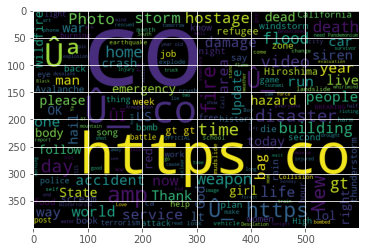

In [ ]:
# Graphiquement en Nuage

wordcloud = WordCloud(width = 600, height = 400).generate(' '.join(counter.keys()))
plt.imshow(wordcloud)
plt.show()

In [ ]:
counter['https']

0

- Data Cleaning

In [11]:
import nltk

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer # Transforme les mots en leur forme de base; eg verbe conjugais à l'infinitif, pluriel en singulier

# Un peu de néttoyage:
#   - on va remplacer les abbréviation et apostrophes du style I'm -> I am, don't -> do not, that's -> that is, ... 
#   - tout mettre en minuscule 
def nettoyer_question(texte):

  wordnet = WordNetLemmatizer()

  # minuscule
  texte = texte.lower()

  # apostrophe & contraction
  texte = re.sub(r"\'s", " is", texte)
  texte = re.sub(r"\'re", " are", texte)
  texte = re.sub(r"\'ll", " will", texte)
  texte = re.sub(r"\'ve", " have", texte)
  texte = re.sub(r"\'d", " would", texte)
  texte = re.sub(r"won't", " will not", texte)
  texte = re.sub(r"can't", " cannot", texte)
  texte = re.sub(r"don't", " dont", texte)

  # Addresse ou lien url
  texte = re.sub(r"^www\.*\.com", "", texte)
  texte = re.sub(r'^https|http?:\/\/.*[\r\n]*', '', texte, flags=re.MULTILINE)

  # Série de nombre
  texte = re.sub(r"[0-9]+", "", texte)

  # caractères accentués
  texte = re.sub(r"[ùéèû]", "", texte)

  dico =  {"ain't" : "am not", 
           "aren't" : "are not", 
           "can't" : "cannot",
           "won't" : "will not",
           "don't" : "dont",
           "couldnt": "couldn't",
           "couldn'tve": "couldn't've", 
           "couldnt've": "couldn't've", 
           "didnt": "didn't", 
           "doesnt": "doesn't", 
           "dont": "don't", 
           "hadn't" : "had not",
           "hasn't" : "has not",
           "i'm" : "i am",
           "o'clock" : "oclock",
           "shouldn't": "shouldnt"}

  texte = ' '.join([ dico[w] if w in dico else w for w in texte.split()] )

  # Prendre la forme de base des mots
  texte = ' '.join([ wordnet.lemmatize(t) for t in texte.split()] )

  texte = texte.replace('\n', ' ')
  texte = texte.replace('\t', ' ')

  # stopwords
  texte = ' '.join([word for word in texte.split(' ') if word not in stopwords])
  
  # C@ratères spéci@ux
  texte = re.sub(r"[-()\"#/@,;:<>{}+=~|.?*/!_'\\\"]", "", texte)

  return texte

print(nettoyer_question("I'm the 'first', they're the second and he's the thi/rd, so I've won o'clock ? Ain't you know ? 000112 the children - http://t.co/YmY4rSkQ3d - 000112 -()\"#/@,;:<>{}+=~|.?*/!_"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
i am first third i won oclock  am you  child 


In [12]:
# Apply
tweets['text'] = tweets['text'].apply(lambda x : nettoyer_question(x))

In [ ]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason this earthquake allah forgive,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,resident ishelter place notified officers evac...,1
3,6,NaN,NaN,people receive wildfires evacuation california,1
4,7,NaN,NaN,sent this photo ruby alaska smoke wildfires po...,1


- Top Disaster Words

In [ ]:
disaster_twwets = tweets[tweets['target'] == 1]['text'].values

In [ ]:
word_frequence = {}

for twt in disaster_twwets:

  word_split = twt.split()

  for word in word_split:
    
    if word in word_frequence.keys():
      word_frequence[word] += 1

    else:
      word_frequence[word] = 1

# Trier dict
word_frequence = {key: value for key, value in sorted(word_frequence.items(), key = lambda item: item[1])}

del disaster_twwets

In [ ]:
list(word_frequence.keys())[-1]

'i'

In [ ]:
word_frequence['the']

KeyError: ignored

(-0.5, 599.5, 399.5, -0.5)

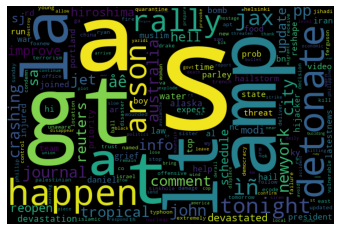

In [ ]:
# l'index donne l'ordre de fréquence 
word_cloud = WordCloud(width = 600, height = 400).generate(' '.join(list(word_frequence.keys())))
plt.imshow(word_cloud)
plt.axis('off')

--> A retravailler, ne me semble pas très juste

In [ ]:
word_frequence['fire']

258

# - Classification par TFIDF & SVM

In [32]:
X = tweets['text']
y = tweets['target']

In [ ]:
"""
Le TF-IDF (de l'anglais term frequency-inverse document frequency) est une méthode de pondération souvent utilisée 
en recherche d'information et en particulier dans la fouille de textes. Cette mesure statistique permet d'évaluer 
l'importance d'un terme contenu dans un document, relativement à une collection ou un corpus. 

Le poids augmente proportionnellement au nombre d'occurrences du mot dans le document. 
Il varie également en fonction de la fréquence du mot dans le corpus. 
Des variantes de la formule originale sont souvent utilisées dans des moteurs de recherche pour apprécier la pertinence d'un document en fonction des critères de recherche de l'utilisateur.

La justification théorique a posteriori de ce schéma de pondération repose sur l'observation empirique de la fréquence des mots dans un texte qui est donnée par la "loi de Zipf". 
Si une requête contient le terme T, un document a d'autant plus de chances d'y répondre qu'il contient ce terme : 
  - la fréquence du terme au sein du document (TF) est grande. Néanmoins, si le terme T est lui-même très fréquent au sein du corpus, c'est-à-dire 
    qu'il est présent dans de nombreux documents (tels les articles définis - le, la, les), il est en fait peu discriminant. 
    
    < C'est pourquoi le schéma propose d'augmenter la pertinence d'un terme en fonction de sa rareté au sein du corpus > 
      - la fréquence du terme dans le corpus (IDF) est élevée. Ainsi, la présence d'un terme rare de la requête dans le contenu d'un document fait croître le « score » de ce dernier.
"""

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)
X.shape

(7613, 15800)

In [ ]:
X[0]

<1x15800 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

---> on a donc pour chaque 7613 tweet 15200 features (mot?) calculées par TF-IFD un score par terme et doc

In [ ]:
X

<7613x15200 sparse matrix of type '<class 'numpy.float64'>'
	with 59079 stored elements in Compressed Sparse Row format>

In [ ]:
X.getrow(1).data

array([0.39849969, 0.48859985, 0.48859985, 0.34547269, 0.3144067 ,
       0.22395183, 0.30883814])

- Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # stratify définit comment son séparer les données

- Lin SVM

In [ ]:
def run_SVM(classifieur, X_train, y_train, X_test, y_test):
  classifieur.fit(X_train, y_train)
  y_pred = classifieur.predict(X_test)

  print()
  print("- Score report -")
  print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import LinearSVC

cls = LinearSVC()
run_SVM(cls, X_train, y_train, X_test, y_test)


- Score report -
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       886
           1       0.81      0.69      0.74       637

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



# - Classification avec Word2vect + SVM

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180945 sha256=19c7343054ec17fb2adc7db5a3128e8d32c545d45d2b98fdf3a6e9dc26881204
  Stored in directory: /tmp/pip-ephem-wheel-cache-w6l1ib3b/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy # contient pre-trained model pour word-embedding
import en_core_web_lg

In [ ]:
# Instancier
nlp = en_core_web_lg.load()

- https://spacy.io/models/fr

- Explication : https://spacy.io/usage/spacy-101 [Paragraphe : Linguistic annotations]

In [ ]:
# Exemple d'utilisation pour une version français
sentence = "Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars"

all = []
nlp = spacy.load("/gdrive/My Drive/NLP/AdvanceNLTK/fr_core_news_sm/fr_core_news_sm-2.2.5")
doc = nlp(sentence)
print(doc.text)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.dep_, token.has_vector, token.vector.shape)
    all.append(token.vector)

Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars
Apple apple NOUN ROOT True (96,)
cherche cherche NOUN amod True (96,)
à à ADP mark True (96,)
acheter acheter VERB acl True (96,)
une un DET det True (96,)
start start NOUN obj True (96,)
- - PUNCT punct True (96,)
up up DET appos True (96,)
anglaise anglaise NOUN amod True (96,)
pour pour ADP case True (96,)
1 1 NUM nummod True (96,)
milliard milliard NOUN obl True (96,)
de de ADP case True (96,)
dollars dollar NOUN nmod True (96,)


- L"embedding est de taille 96 pour _sm et de 300 pour _lg

- Obtenir la vectorisation de document
Document Vectors
Spacy also provides document vector by calculating the average of all the word/token vectors that occur in a sentense.

In [ ]:
doc.vector.shape

(96,)

In [ ]:
doc.vector

array([-1.4455745 ,  2.0170135 , -3.4061456 ,  0.12271946,  2.641822  ,
       -0.08996066, -0.746046  ,  2.136275  ,  1.1613601 ,  0.46041042,
       -1.9443346 ,  1.750479  , -2.3946779 ,  0.693345  , -1.302231  ,
        0.6025554 , -1.0520483 ,  2.6658132 , -1.2950622 ,  4.1004524 ,
        1.3794324 , -0.80563056, -2.5668855 ,  0.4820497 ,  1.8510624 ,
        2.8431852 ,  2.4392066 ,  0.03633159,  0.4553164 , -3.960356  ,
       -1.1939749 ,  0.31517628, -1.54586   ,  0.2428587 ,  1.0347959 ,
       -0.24616757,  1.2287982 , -2.521609  , -0.46056345, -1.8185043 ,
        0.6264748 , -2.6475132 , -1.0260384 , -1.2181009 ,  0.15263428,
       -2.786602  , -0.7035762 , -0.6395558 , -0.00849519, -0.5311655 ,
       -2.073179  ,  0.44788155,  1.683483  , -0.04946637, -2.525806  ,
       -0.6377646 , -0.02714382, -1.5815176 ,  0.2182848 ,  0.91667044,
       -0.491005  , -2.171171  , -0.10476834, -2.7656364 ,  2.1938355 ,
        1.0311648 ,  2.0772347 , -0.33747047, -0.785029  ,  1.95

- Test pour voir - Je récupère tout les embedding - créer une matrice et fais la moyenne par ligne

In [ ]:
# list to matrix
matrix = np.asarray(all, dtype = np.float32)

In [ ]:
matrix.mean(axis = 0)

array([-1.4455745 ,  2.0170135 , -3.4061456 ,  0.12271946,  2.641822  ,
       -0.08996066, -0.746046  ,  2.136275  ,  1.1613601 ,  0.46041042,
       -1.9443346 ,  1.750479  , -2.3946779 ,  0.693345  , -1.302231  ,
        0.6025554 , -1.0520483 ,  2.6658132 , -1.2950622 ,  4.1004524 ,
        1.3794324 , -0.80563056, -2.5668855 ,  0.4820497 ,  1.8510624 ,
        2.8431852 ,  2.4392066 ,  0.03633159,  0.4553164 , -3.960356  ,
       -1.1939749 ,  0.31517628, -1.54586   ,  0.2428587 ,  1.0347959 ,
       -0.24616757,  1.2287982 , -2.521609  , -0.46056345, -1.8185043 ,
        0.6264748 , -2.6475132 , -1.0260384 , -1.2181009 ,  0.15263428,
       -2.786602  , -0.7035762 , -0.6395558 , -0.00849519, -0.5311655 ,
       -2.073179  ,  0.44788155,  1.683483  , -0.04946637, -2.525806  ,
       -0.6377646 , -0.02714382, -1.5815176 ,  0.2182848 ,  0.91667044,
       -0.491005  , -2.171171  , -0.10476834, -2.7656364 ,  2.1938355 ,
        1.0311648 ,  2.0772347 , -0.33747047, -0.785029  ,  1.95

--> Ok!

In [ ]:
nlp1 = en_core_web_lg.load() # à mettre en var ext

def get_vect(sentence):
  
  doc = nlp1(sentence)
  vec = doc.vector
  
  return vec

In [ ]:
# Apply to twwet 
tweets['vec'] = tweets['text'].apply(lambda x : get_vect(x))

In [ ]:
# Look
X = tweets['vec'].to_numpy()
X.shape

(7613,)

In [ ]:
X

array([array([-4.267158  ,  2.6776607 , -2.0041194 ,  1.0535275 ,  3.9436696 ,
       -1.3008202 , -3.8123872 , -0.36880863,  2.9376116 ,  0.03225772,
       -2.0645769 , -1.308684  ,  0.6713559 ,  0.7356072 ,  0.90976787,
        4.318118  ,  1.5773047 ,  1.3325347 , -3.0526202 , -0.82886666,
        3.4045856 , -2.0738933 , -3.548834  ,  3.4464486 ,  0.63596463,
        6.718189  , -1.0649537 , -6.5855117 ,  0.37563777, -3.323332  ,
       -4.396764  , -5.1983314 ,  5.048884  , -3.1493108 , -0.57227975,
       -1.675849  ,  2.5812485 , -5.2989902 , -2.7774103 ,  0.32549798,
       -3.6892014 , -0.84235996, -0.4680687 , -2.961827  ,  1.62104   ,
       -0.14587812, -0.10609382,  1.5349679 ,  3.627526  , -2.6704838 ,
       -1.7871294 ,  2.95879   ,  1.3071538 , -2.620797  , -4.120881  ,
        5.0298715 , -2.277641  , -5.100824  , -1.7833714 ,  0.92675203,
       -0.28993306, -2.2816663 , -1.5460933 , -4.0010753 ,  4.453262  ,
        3.410691  ,  3.0712402 ,  2.4003909 ,  0.48801565

In [ ]:
# Devrait être 7613 x 300 ? -- 

In [ ]:
X = X.reshape(-1, 1)
X.shape

(7613, 1)

In [ ]:
# Argh c'est pas ça ...

In [ ]:
# Ok j'ai trouvé cette dolution pour retrouver le format attendu
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)
X.shape

(7613, 300)

In [ ]:
y = tweets['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # stratify définit comment son séparer les données

def run_SVM(classifieur, X_train, y_train, X_test, y_test):
  classifieur.fit(X_train, y_train)
  y_pred = classifieur.predict(X_test)

  print()
  print("- Score report -")
  print(classification_report(y_test, y_pred))


from sklearn.svm import LinearSVC

cls = LinearSVC()
run_SVM(cls, X_train, y_train, X_test, y_test)


- Score report -
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       886
           1       0.78      0.70      0.74       637

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



-> Cl
  - Le score est légérement + bas - 1%
  - La différence des score peut s'expliqué par la vectorization, spacy est entrainé sur un anglais "propre" avec un certain voca qui n'est pas celui de Tweeter (%tag truc, misspelled english, ....), donc pour els mots qu'il ne connait pas on aura un vecteur vide (rappel le cas avec GLoVe) donc des mot à valeurt inutile.
  - Amélioration : par hyperparam ou autre modle, random forest, xgboost, ...

# - Classification par WordEmbedding + DeepLearning

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Embedding, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D

- 1. Tokeniser

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # stratify définit comment son séparer les données

In [18]:
tokenizer = Tokenizer(oov_token = True)
tokenizer.fit_on_texts(X_train) # Lire les Args dans VQA.ipnyb : poir les choix de fit sur train et pas all

In [23]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test  = tokenizer.texts_to_sequences(X_test)

- 2. Vocab size

In [24]:
VOCAB_SIZE = len(tokenizer.word_index) + 1 # Le +1 est dans la la doc Keras
VOCAB_SIZE

13958

- 3. Padding

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


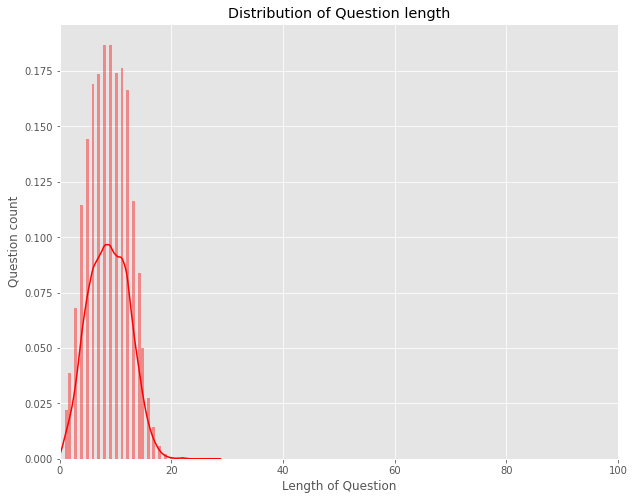

In [26]:
# Petit regard sur la distribution en terle de longeur
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

all_tweets = tweets.text.values

tweets_len = [len(text.split(' ')) for text in all_tweets]

plt.figure(figsize=(10,8))
sns.distplot(tweets_len, color='red')
plt.title('Distribution of Question length')
plt.xlabel('Length of Question')
plt.ylabel('Question count')
plt.xlim(0, 100)
plt.show()

In [27]:
for i in range(0,11):
    print(10*i,'percentile value is', np.percentile(tweets_len,10*i))

print(np.mean(tweets_len))

0 percentile value is 1.0
10 percentile value is 4.0
20 percentile value is 5.0
30 percentile value is 7.0
40 percentile value is 8.0
50 percentile value is 9.0
60 percentile value is 10.0
70 percentile value is 11.0
80 percentile value is 12.0
90 percentile value is 13.0
100 percentile value is 27.0
8.775909628267437


In [13]:
# D'après la section plu shaute 90% des tweet avaient au mieux 13 mots (après preprocess) - on peut aller jusqu'à 27 mots en regardant la densité, donc restont sur 27
MAX_LENGTH = 27

In [29]:
X_train = pad_sequences(X_train, maxlen = MAX_LENGTH, padding = 'post')
X_test = pad_sequences(X_test, maxlen = MAX_LENGTH, padding = 'post')

In [30]:
X_train.shape

(6090, 27)

- Test avec SVM

In [31]:
def run_SVM(classifieur, X_train, y_train, X_test, y_test):
  classifieur.fit(X_train, y_train)
  y_pred = classifieur.predict(X_test)

  print()
  print("- Score report -")
  print(classification_report(y_test, y_pred))


from sklearn.svm import LinearSVC

cls = LinearSVC()
run_SVM(cls, X_train, y_train, X_test, y_test)


- Score report -
              precision    recall  f1-score   support

           0       0.54      0.20      0.29       886
           1       0.41      0.76      0.53       637

    accuracy                           0.43      1523
   macro avg       0.47      0.48      0.41      1523
weighted avg       0.48      0.43      0.39      1523



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--> Bof, bof marche moyen par SVM

- Par DeepL

In [69]:
model = Sequential()
model.add(Embedding(input_dim = VOCAB_SIZE, output_dim = 100, input_length = MAX_LENGTH)) #" in (None, 13958) out : (None, 13958, 100)"
model.add(Conv1D(filters = 64, kernel_size = 2, strides = 1, activation = 'relu'))
model.add(Dropout(rate = 0.2)) # rEGULARIZATION
model.add(MaxPooling1D(2))

model.add(GlobalMaxPooling1D())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(rate = 0.2)) # rEGULARIZATION

model.add(Dense(16, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid', name = 'finale'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

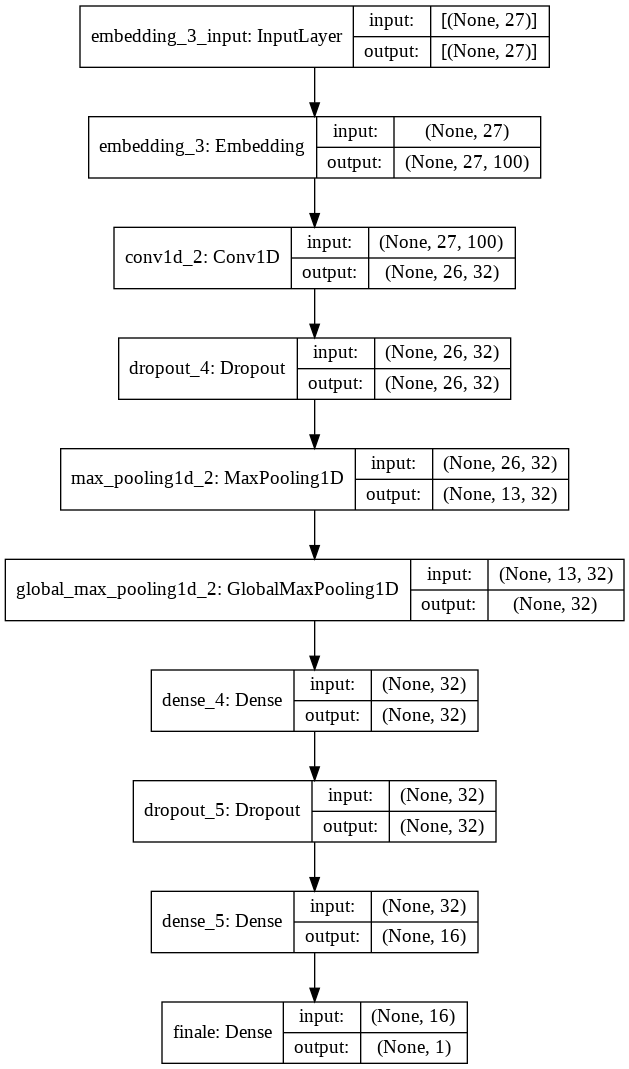

In [40]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [70]:
model.fit(X_train, y_train, batch_size = 32, epochs = 15, validation_data = (X_test, y_test))

Epoch 1/15
191/191 [==============================] - 6s 25ms/step - loss: 0.6439 - accuracy: 0.6214 - val_loss: 0.4840 - val_accuracy: 0.7669
Epoch 2/15
191/191 [==============================] - 4s 22ms/step - loss: 0.3239 - accuracy: 0.8771 - val_loss: 0.4891 - val_accuracy: 0.7669
Epoch 3/15
191/191 [==============================] - 4s 22ms/step - loss: 0.1707 - accuracy: 0.9424 - val_loss: 0.5294 - val_accuracy: 0.7663
Epoch 4/15
191/191 [==============================] - 4s 22ms/step - loss: 0.0954 - accuracy: 0.9725 - val_loss: 0.5906 - val_accuracy: 0.7557
Epoch 5/15
191/191 [==============================] - 4s 22ms/step - loss: 0.0826 - accuracy: 0.9748 - val_loss: 0.6462 - val_accuracy: 0.7525
Epoch 6/15
191/191 [==============================] - 4s 22ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.6705 - val_accuracy: 0.7577
Epoch 7/15
191/191 [==============================] - 4s 22ms/step - loss: 0.0588 - accuracy: 0.9780 - val_loss: 0.6847 - val_accuracy: 0.7649

- Test

In [71]:
t = "This accident happened so early that we wasn't proepare at all"

t = nettoyer_question(t)
t = [t] # Corrigne la sortie de predict : (37, 1 au lieu de (,1))
t = tokenizer.texts_to_sequences(t)
t = pad_sequences(t, maxlen = MAX_LENGTH, padding = 'post')

disaster = model.predict(t)

In [72]:
'Potentiel Désastre' + str(disaster[0]) if disaster > 0.5 else 'Improbale'

'Potentiel Désastre[0.8787266]'

In [84]:
'Potentiel Désastre' + str(disasters[1]) if disasters[1] > 0.5 else 'Improbale'

'Potentiel Désastre[0.9973009]'

In [89]:
disasters = model.predict(X_test)

# convertir à partir d'un seuil les valeurs de retour car cible = 0 ou 1 et sortie float 0.xxx mais jamais 1
y_pred = [1 if x > 0.6 else  0 for x in disasters]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       886
           1       0.73      0.70      0.71       637

    accuracy                           0.76      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.76      0.76      0.76      1523



In [ ]:
"""
Le résultat est légérement en deça du modèle TF-IDF + SVM mais reste correct, la precision et sensibilité/rappel reste elevé
- Score report -
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       886
           1       0.81      0.69      0.74       637

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

"""

# - PClassification par BERT

In [4]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 123kB/s 
     |████████████████████████████████| 6.8MB 32.7MB/s 
     |████████████████████████████████| 983kB 35.7MB/s 
     |████████████████████████████████| 266kB 45.1MB/s 
     |████████████████████████████████| 1.9MB 32.6MB/s 
     |████████████████████████████████| 1.2MB 30.0MB/s 
     |████████████████████████████████| 471kB 39.3MB/s 
     |████████████████████████████████| 901kB 38.9MB/s 
     |████████████████████████████████| 3.3MB 37.2MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.5-cp37-none-any.whl size=25281426 sha256=3a25ae61102cb1e8a909d11bcb1086aad6ab02208ce3055f8e7a797e01c7214b
  Stored in directory: /root/.cache/pip/wheels/7a/22/76/e529b9bce5fffe20d7f7d53b2dc7996b145e74ae516bf54f83
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=36621da15858b31af04314981cfd9323e507518c2e27e153af6877607127341d
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7d

In [5]:
import ktrain
from ktrain import text

In [21]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df = tweets, text_column = 'text', label_columns = ['target'], maxlen = MAX_LENGTH, val_df = None, val_pct = 0.10, preprocess_mode= 'bert')

['not_target', 'target']
      not_target  target
5143         0.0     1.0
3586         1.0     0.0
3570         0.0     1.0
1718         1.0     0.0
5155         1.0     0.0
['not_target', 'target']
      not_target  target
689          1.0     0.0
1827         0.0     1.0
2263         1.0     0.0
4956         0.0     1.0
1515         0.0     1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [22]:
model = text.text_classifier(name = 'bert', train_data = (X_train, y_train), preproc = preproc)

Is Multi-Label? False
maxlen is 27
done.


In [23]:
learner = ktrain.get_learner(model = model, train_data = (X_train, y_train), val_data = (X_test, y_test), batch_size = 64)

In [24]:
h = learner.fit_onecycle(lr = 0.0001, epochs = 10)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/10
108/108 [==============================] - 1770s 16s/step - loss: 0.4983 - accuracy: 0.7663 - val_loss: 0.4151 - val_accuracy: 0.8281
Epoch 2/10
108/108 [==============================] - 1742s 16s/step - loss: 0.3750 - accuracy: 0.8466 - val_loss: 0.4186 - val_accuracy: 0.8150
Epoch 3/10
108/108 [==============================] - 1742s 16s/step - loss: 0.3025 - accuracy: 0.8796 - val_loss: 0.6258 - val_accuracy: 0.7835
Epoch 4/10
 10/108 [=>............................] - ETA: 25:40 - loss: 0.3038 - accuracy: 0.8703

KeyboardInterrupt: ignored

- Quele est le meilleurs learning rate ? (WARNING : Passer en GPU ou TFU prend au moins 12h !

In [ ]:
%%time
learner.lr_find()
learner.lr_plot()

- Evaluation

In [27]:
predictor = ktrain.get_predictor(learner.model, preproc)

sentences = ['I met Sam by accident today', 'I had a car accident during a earthquake']

predictor.predict(sentences, return_proba = True) # retournr la probabilité de chaque classe par phrase/document/texte 

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:215: UserWarning: List or array of two texts supplied, so task being treated as text classification. If this is a sentence pair classification task, please cast to tuple.
  warnings.warn('List or array of two texts supplied, so task being treated as text classification. ' +\


array([[0.6780753 , 0.32192472],
       [0.03491574, 0.96508425]], dtype=float32)

In [28]:
predictor.get_classes()

['not_target', 'target']

--> Intérprétation : 

  -1 La première phrase en concerne pas un accident réel comprend le contxte de la rencontre fortuite
  
  -2 La deuxième est ciblé comme un vrai accident (accident + eathquake, je suppose que cela aide) 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # stratify définit comment son séparer les données
X_test

array(['katiekatcubs you this shit goes world armageddon',
       'lemairelee danharmon people near meltdown comic free time wait line sunday night representative sample ',
       ' tix calgary flame col avalanche preseason  scotiabank saddledome',
       ..., 'alfapedia burst bomb suicide bomber',
       'super awkward world collide',
       'philippine protect internally displaced person warns un expert  diplomat'],
      dtype=object)

In [40]:
y_pred = predictor.predict(X_test)

In [41]:
# convertir en 0 et 1
y_pred = [1 if x == 'target' else 0 for x in y_pred]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       886
           1       0.86      0.94      0.90       637

    accuracy                           0.91      1523
   macro avg       0.91      0.91      0.91      1523
weighted avg       0.91      0.91      0.91      1523



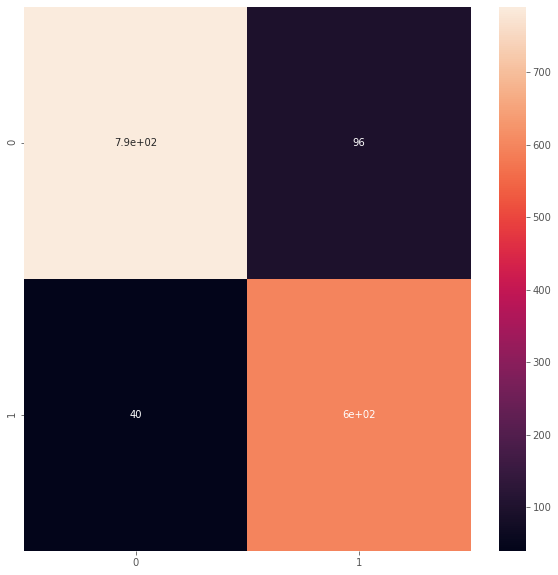

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize= (10, 10))
sns.heatmap(cm, annot=True)

**Cl : C'est pas mal (97%), bien meilleurs que TF-IDF et SVM (80%) et DeepL (76%) - même si amélioration possible pour ce dernier **

In [49]:
model.save('BERTDisaster_model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [50]:
# charged_model = tf.keras.models.load_model("BERTDisaster_model.h5")